# An example using Feature weighted ECM clustering


In [1]:
## Importing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
from evclust.ecm import ecm
from evclust.fwecm import fwecm
from evclust.utils import ev_summary, ev_plot, ev_pcaplot
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.metrics import adjusted_rand_score
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


IRIS DS: 150 instances, 4 features


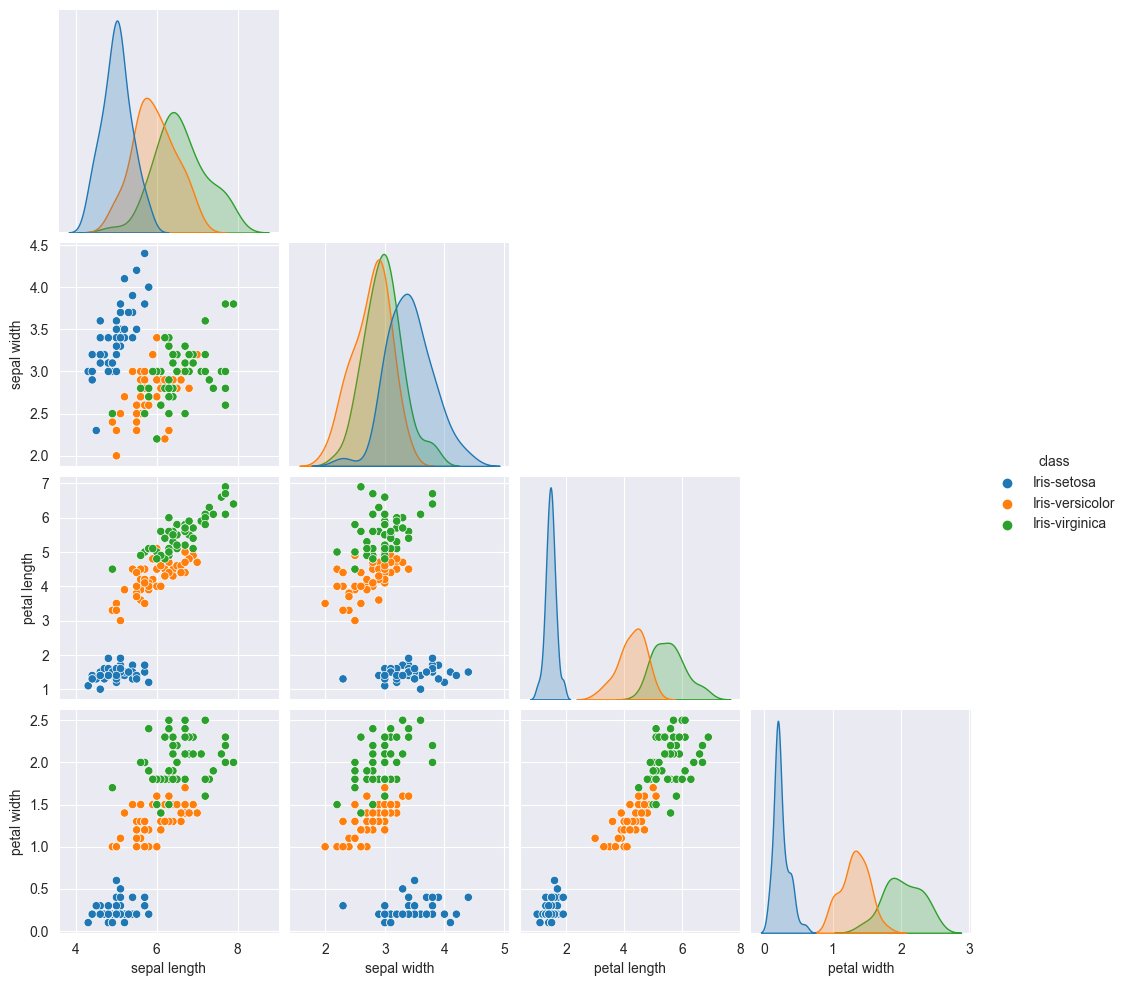

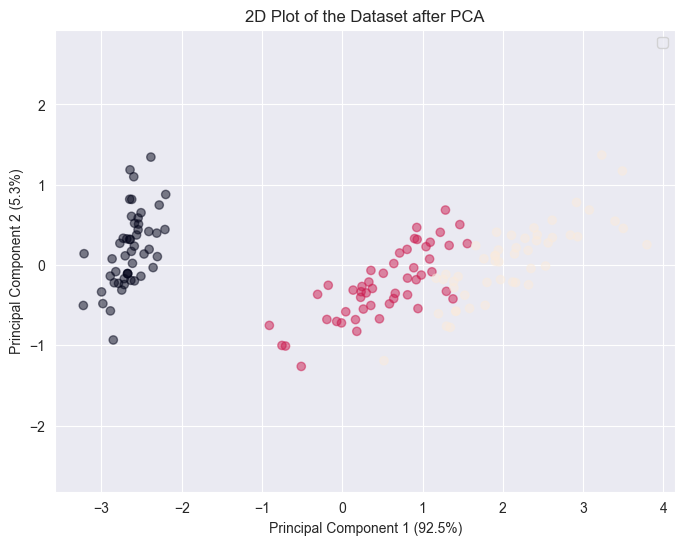

In [2]:
# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y['class'])
df = pd.concat([X, y], axis=1)
#Covariance matrix
# labels = np.unique(y['class'])
# cov_mat1 = np.cov(X[y['class'] == labels[0]].transpose())
# cov_mat2 = np.cov(X[y['class'] == labels[1]].transpose())
# cov_mat3 = np.cov(X[y['class'] == labels[2]].transpose())
# print(f"Covariance Matrix 1: {cov_mat1.diagonal()}")
# print(f"Covariance Matrix 2: {cov_mat2.diagonal()}")
# print(f"Covariance Matrix 3: {cov_mat3.diagonal()}")

# Scatter matrix plot
sns.pairplot(df, corner=True, hue="class")

print(f"IRIS DS: {X.shape[0]} instances, {X.shape[1]} features")
# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions
data_reduced = pca.fit_transform(X)
variance_percent = np.round(pca.explained_variance_ratio_ * 100, 1)

# Plot the reduced dataset with different colors for each cluster
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], alpha=0.5, c=numeric_labels)
plt.title('2D Plot of the Dataset after PCA')
plt.xlabel(f"Principal Component 1 ({variance_percent[0]}%)")
plt.ylabel(f"Principal Component 2 ({variance_percent[1]}%)")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

# Normalization
# scaler = MinMaxScaler((0,1))
# X = pd.DataFrame(scaler.fit_transform(X))


In [3]:
# Non-specificity values
def calculate_non_specificity(cluster_model):
    m = cluster_model['mass']
    F = cluster_model['F']
    c = F.shape[1]
    card = np.sum(F[1:F.shape[0], :], axis=1)

    log_card = np.log2(card)
    tmp = np.tile(log_card.transpose(), (m.shape[0], 1))
    m_log_card = m[:, :-1] * tmp

    mvide = m[:, -1][:, np.newaxis]
    tmp2 = mvide * np.log2(c)
    tmp3 = np.tile(tmp2, (1, m.shape[1] - 1))

    non_specificity = m_log_card + tmp3
    object_non_specificity = np.sum(non_specificity, axis=1)

    print(f"Maximum Non-specificity value: {max(object_non_specificity)}")
    print(f"Minimum Non-specificity value: {min(object_non_specificity)}")
    print(f"Average Non-specificity value: {np.mean(object_non_specificity)}")

## Traditional ECM

[1, 40.39891104898874]
[2, 39.9860312212641]
[3, 39.89949214067472]
[4, 39.84166112971091]
[5, 39.789440923820145]
[6, 39.73643853329933]
[7, 39.67983953627165]
[8, 39.61875587373487]
[9, 39.55387399650675]
[10, 39.48729022830762]
[11, 39.42211337625699]
[12, 39.36171308924909]
[13, 39.308833101769594]
[14, 39.264972244000404]
[15, 39.23028295746109]
[16, 39.20390476508093]
[17, 39.18445529333431]
[18, 39.17044445862777]
[19, 39.16052303429736]
[20, 39.15358463864304]
[21, 39.14877636486544]
[22, 39.145466528878806]
[23, 39.14319957863053]
[24, 39.1416528646903]
[25, 39.140600716415555]
[26, 39.1398866986038]
[ 0.        39.1398867 39.1398867]
[1, 40.300103330259404]
[2, 39.94870440566841]
[3, 39.86546937594632]
[4, 39.80597902404369]
[5, 39.750298903647824]
[6, 39.69295715316419]
[7, 39.6319383824896]
[8, 39.56726690264305]
[9, 39.500599495022776]
[10, 39.43479514296679]
[11, 39.37318385744248]
[12, 39.318659216916735]
[13, 39.27297091675166]
[14, 39.23651308720511]
[15, 39.2085866485

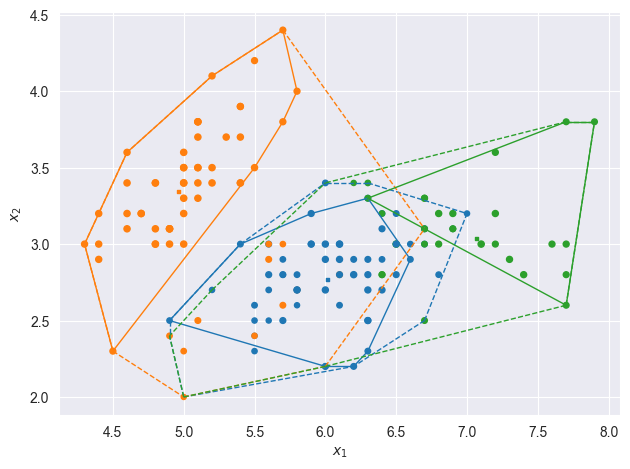

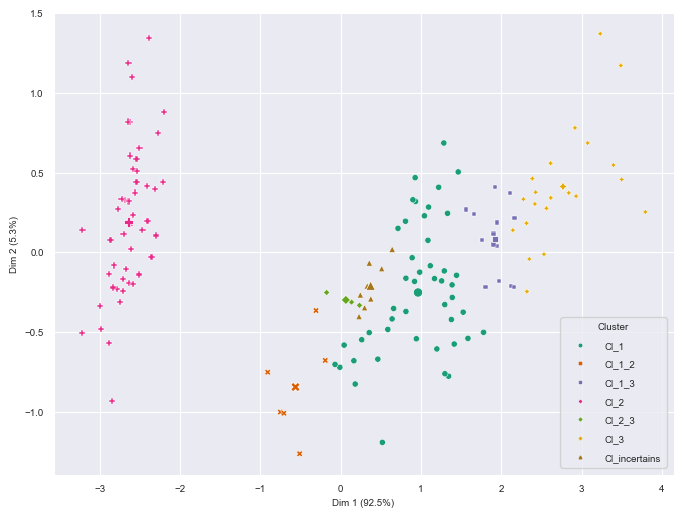

----------Traditional ECM----------
Adjusted Rand Index (ARI): 0.5987303078930358
Maximum Non-specificity value: 6.858599945191292
Minimum Non-specificity value: 0.3620316491058242
Average Non-specificity value: 1.5002743260112485


In [41]:
# Traditional ECM clustering
delta = 100
model = ecm(x=X, c=3, beta=2, alpha=1, delta=delta, ntrials=10)

ev_plot(model, X=X, cex=20)
ev_pcaplot(data=X, x=model, normalize=False, cex=20)

# Compute the Adjusted Rand Index (ARI)
true_labels = numeric_labels
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Traditional ECM----------")
print(f"Adjusted Rand Index (ARI): {ari}")

# Calculate Non-specificity
calculate_non_specificity(model)

## Feature weighted ECM (FW-ECM)

Initial weight matrix: 
 [[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]
[1, 2.525164523025691]
[2, 2.025293873463591]
[3, 1.7702861430541381]
[4, 1.6204321256171235]
[5, 1.5239061020522175]
[6, 1.4541055588007312]
[7, 1.3966516484827634]
[8, 1.342692387440405]
[9, 1.2909808716464213]
[10, 1.2513602938346198]
[11, 1.226070234189768]
[12, 1.2089259837107518]
[13, 1.1957335284098154]
[14, 1.1846903177468866]
[15, 1.1750495106898775]
[16, 1.1664538468438632]
[17, 1.1587058778976889]
[18, 1.1516876656860022]
[19, 1.1453262378422278]
[20, 1.139575075793764]
[21, 1.1344026600401325]
[22, 1.1297847040430513]
[23, 1.125698586024583]
[24, 1.122119387521514]
[25, 1.1190174336737257]
[26, 1.1163573814279122]
[27, 1.114098772995652]
[28, 1.1121977114828276]
[29, 1.110609113226803]
[30, 1.1092889658792302]
[31, 1.10819616559233]
[32, 1.1072937276992059]
[33, 1.1065493641340318]
[34, 1.1059355447352028]
[0.         1.10593554 1.10593554]
Initial weight matrix: 
 [[0.25 0.25 0.2

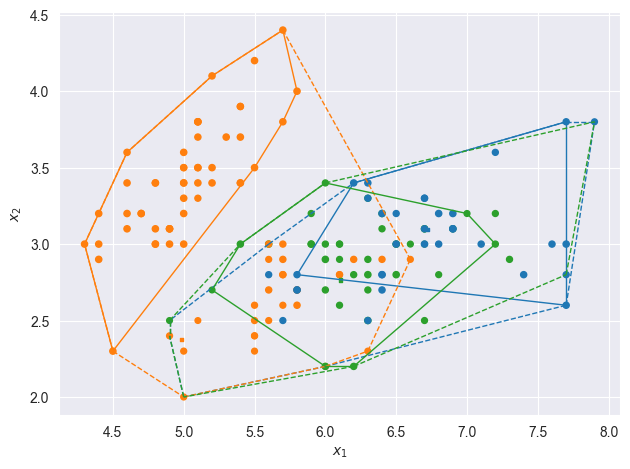

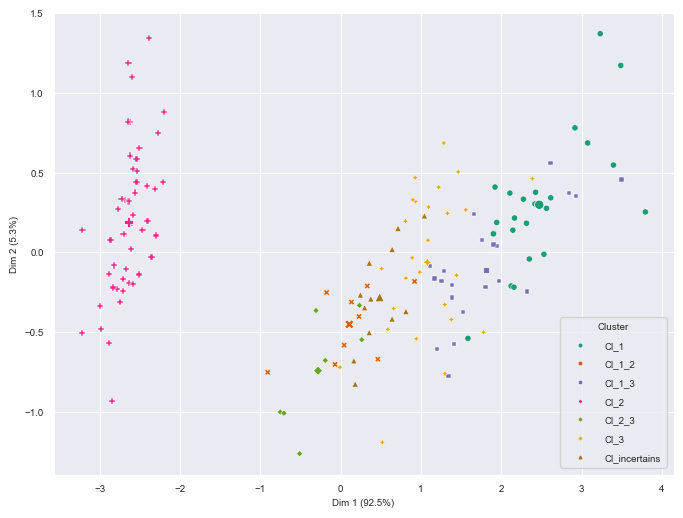

----------Feature weighted ECM----------
Adjusted Rand Index (ARI): 0.4252066898583907 - J value: 1.105313330998149
Maximum Non-specificity value: 8.94842749122643
Minimum Non-specificity value: 0.018987665191243855
Average Non-specificity value: 1.66902309225231


In [4]:
# Feature weighted ECM clustering
c = 3
d = X.shape[1]
W = np.ones((c, d)) * (1/d)
delta = 100
model = fwecm(x=X, c=c, W=W, beta=2, alpha=1, delta=delta, ntrials=10, epsi=1e-3)

ev_plot(model, X=X, cex=20)
ev_pcaplot(data=X, x=model, normalize=False, cex=20)

true_labels = numeric_labels
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

# Compute the Adjusted Rand Index (ARI)
ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Feature weighted ECM----------")
print(f"Adjusted Rand Index (ARI): {ari} - J value: {model['crit']}")

# Calculate Non-specificity
calculate_non_specificity(model)

In [6]:
W = model['W']
print(f"Weight matrix: \n {W}")
print(f"Centers: \n {model['g']}")
# cov_mat1 = np.cov(X[predicted_labels == 0].transpose())
# cov_mat2 = np.cov(X[predicted_labels == 1].transpose())
# cov_mat3 = np.cov(X[predicted_labels == 2].transpose())
# print(f"Covariance Matrix 1: {cov_mat1.diagonal()}")
# print(f"Covariance Matrix 2: {cov_mat2.diagonal()}")
# print(f"Covariance Matrix 3: {cov_mat3.diagonal()}")
# 
# W_COV_1 = pd.DataFrame({'y': W[0, :], 'x': cov_mat1.diagonal()})
# W_COV_1.sort_values('x', inplace=True)
# W_COV_2 = pd.DataFrame({'y': W[1, :], 'x': cov_mat2.diagonal()})
# W_COV_2.sort_values('x', inplace=True)
# W_COV_3 = pd.DataFrame({'y': W[2, :], 'x': cov_mat3.diagonal()})
# W_COV_3.sort_values('x', inplace=True)
# 
# plt.clf()
# plt.scatter(W_COV_1['x'], W_COV_1['y'], label = "cluster 1", marker='o')
# plt.scatter(W_COV_2['x'], W_COV_2['y'], label = "cluster 2", marker='o')
# plt.scatter(W_COV_3['x'], W_COV_3['y'], label = "cluster 3", marker='o')
# plt.xlabel("Variance of clusters")
# plt.ylabel("Weight of clusters w.r.t each dimension")
# plt.legend()
# plt.show()

Weight matrix: 
 [[0.04162432 0.19213835 0.02004646 0.74619087]
 [0.05679448 0.00618437 0.16480838 0.77221276]
 [0.02077283 0.08126706 0.01884428 0.87911583]]
Centers: 
 [[6.7192071  3.09652682 6.29571133 2.23125888]
 [4.9814776  2.37409375 1.46604112 0.23219193]
 [6.10385024 2.76490348 5.04898818 1.50182609]]
